# Build a neural network with 2 hiden layers

In [118]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import graphviz

## generate some data

In [220]:
X = 1*(np.random.rand(2, 2000) - 0.5) # X has 400 samples, each sample has two features,
Y = np.zeros((1, 600))


In [221]:
# label Y based on a shape
def label_Y(X):
    Y = np.zeros((1, X.shape[1]))
    for i_ in range(X.shape[1]):
        x1 = X[0, i_]
        x2 = X[1, i_]
        if x1**2 + x2**2/3 >= 0.2**2 and x1**2/3 + x2**2 <= 0.4**2:
            Y[0, i_] = 0
        else:
            Y[0, i_] = 1  
    return Y
Y = label_Y(X)

In [222]:
df = pd.DataFrame()
df['x1'] = X[0, :]
df['x2'] = X[1, :]
df['y'] = Y[0, :]
df.head()

,x1,x2,y
0,0.418821,-0.117055,0.0
1,0.388626,0.304703,0.0
2,0.460686,0.204587,0.0
3,-0.230185,-0.270250,0.0
4,-0.423680,0.030236,0.0


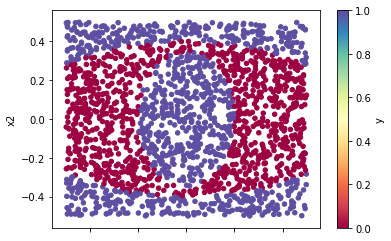

In [223]:
df.plot('x1', 'x2', kind="scatter", c='y', cmap=plt.cm.Spectral)

## define the neural network model structure

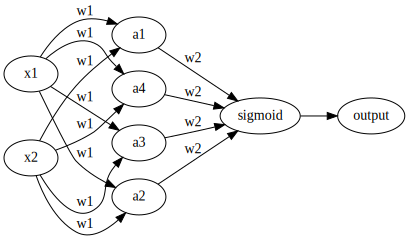

In [157]:
d = graphviz.Digraph()
d.attr(rankdir='LR')
d.node('x1')
d.node('x2')

d.edge('x1', 'a1', 'w1')
d.edge('x1', 'a2', 'w1')
d.edge('x1', 'a3', 'w1')
d.edge('x1', 'a4', 'w1')

d.edge('x2', 'a1', 'w1')
d.edge('x2', 'a2', 'w1')
d.edge('x2', 'a3', 'w1')
d.edge('x2', 'a4', 'w1')

d.edge('a1', 'sigmoid', 'w2')
d.edge('a2', 'sigmoid', 'w2')
d.edge('a3', 'sigmoid', 'w2')
d.edge('a4', 'sigmoid', 'w2')

d.edge('sigmoid', 'output')
d

#### the activation function sigmoid

In [ ]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

#### initialize parameters W and b

In [ ]:
def init_parameters(n_x, n_h, n_y):
    
    W1 = np.random.rand(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    # save all parameters as a dict
    parameters = {'W1': W1, 'b1':b1, 'W2': W2, 'b2': b2}
    
    return parameters

#### forward propagation

$$
Z = WX + b \\
A = tanh(Z)
$$

In [ ]:
def forward_prop(X, parameters):
    W1 = parameters["W1"] 
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Forward Propagation to calculate A2
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
        
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache    

#### compute cost

In [ ]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -1/m * np.sum(logprobs)
    
    return cost

#### backward propagation

In [ ]:
def backward_prop(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * ( 1 - np.power(A1, 2) )
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return grads

#### update parameters

update rule
 $$
 W = W - \alpha * dW \\
 b = b - \alpha * db
 $$

In [50]:
def update_parameters(parameters, grads, learning_rate = 1.2):
   
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

#### the 2 layers neural network model

In [52]:
def nn_model_2_layers(X, Y, n_h, num_iterations=1000, learning_rate=0.1):
    """
    Input:
    X -- dataset, (num of features, num of samples) 
    Y -- labels, (1, num of samples)
    n_h 
     
    Returns:
    parameters -- parameters learnt by the model
    cost_list -- cost changes over iterations
    """
    # initialize parameters based on the shape of the neural network
    n_x = X.shape[0]
    n_y = Y.shape[0] 
    parameters = init_parameters(n_x=n_x, n_h=n_h, n_y=n_y)
       
    # begin gradient descent iteration
    cost_list = []
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_prop(X, parameters)
        # compute cost
        cost = compute_cost(A2, Y, parameters)
        # backward propagation
        grads = backward_prop(parameters, cache, X, Y)
        # update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # append cost 
        cost_list.append(cost)
        
    return parameters, cost_list
    
    

In [56]:
def predict(parameters, X):
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_prop(X, parameters)
    predictions = np.around(A2)
    
    return predictions

#### training and prediction

Text(0, 0.5, 'cost')

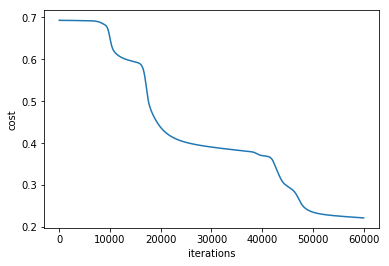

In [227]:
parameters, cost_list = nn_model_2_layers(X, Y, n_h=6, num_iterations=60000, learning_rate=0.2)

plt.plot(range(0,len(cost_list)), cost_list)
plt.xlabel('iterations')
plt.ylabel('cost')

Text(0.5, 1.0, 'true')

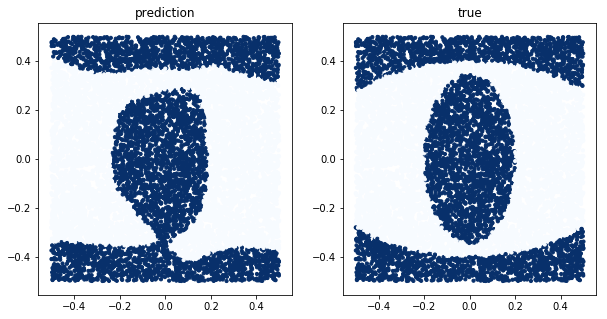

In [231]:
X_new = 1* (np.random.rand(2, 10000) - 0.5)

Y_pred = predict(parameters, X_new)
Y_true = label_Y(X_new)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_new[0,:], X_new[1,:], c=Y_pred[0,:], cmap=plt.cm.Blues, s=10)
plt.title('prediction')
plt.subplot(122)
plt.scatter(X_new[0,:], X_new[1,:], c=Y_true[0,:], cmap=plt.cm.Blues, s=10)
plt.title('true')

Text(0.5, 1.0, 'true')

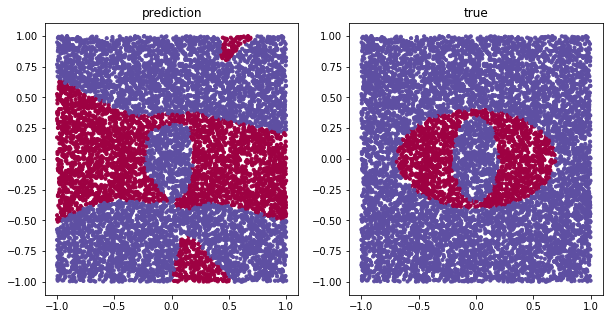

In [229]:
X_new = 2* (np.random.rand(2, 10000) - 0.5)

Y_pred = predict(parameters, X_new)
Y_true = label_Y(X_new)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_new[0,:], X_new[1,:], c=Y_pred[0,:], cmap=plt.cm.Spectral, s=10)
plt.title('prediction')
plt.subplot(122)
plt.scatter(X_new[0,:], X_new[1,:], c=Y_true[0,:], cmap=plt.cm.Spectral, s=10)
plt.title('true')